In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from dataset import LayoutDataset
from models import LayoutMLP
from scipy.stats import kendalltau

2023-10-01 15:53:47.202405: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-01 15:53:47.202437: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-01 15:53:47.202460: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-01 15:53:47.206491: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 15:53:47.785963: W tensorflow/compiler/

In [2]:
batch_size = 32
dataset = LayoutDataset(
    batch_size, train_sample_fraction=1.0, 
    subset=None, build_tfrecords=False)

2023-10-01 15:53:57.999169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-01 15:53:58.090653: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-01 15:53:58.090859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
mlp = LayoutMLP(batch_size, learning_rate=1e-3, mask_max_len=500)

In [4]:
mlp.train(dataset.train_data, dataset.valid_data)

2023-10-01 15:54:09.680485: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 361984000 exceeds 10% of free system memory.
2023-10-01 15:54:09.919099: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 361984000 exceeds 10% of free system memory.
2023-10-01 15:54:13.605408: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f07f6c43460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-01 15:54:13.605437: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-10-01 15:54:13.609507: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-01 15:54:13.758212: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-10-01 15:54:13.820706: I ./tensorflow/compiler/jit/de

iteration 100 training loss 1.5033263 lr 0.00100
iteration 200 training loss 1.3665657 lr 0.00100
iteration 300 training loss 1.34803 lr 0.00100
iteration 400 training loss 1.3024803 lr 0.00100
iteration 500 training loss 1.2527323 lr 0.00100
iteration 600 training loss 1.208147 lr 0.00100
iteration 700 training loss 1.14368 lr 0.00100
iteration 800 training loss 1.4597728 lr 0.00100
iteration 900 training loss 1.3765484 lr 0.00100
iteration 1000 training loss 1.3109624 lr 0.00100
iteration 1100 training loss 1.2522932 lr 0.00100
iteration 1200 training loss 1.1681379 lr 0.00100
iteration 1300 training loss 1.2762314 lr 0.00100
iteration 1400 training loss 1.1122134 lr 0.00100
iteration 1500 training loss 1.1251208 lr 0.00100
iteration 1600 training loss 1.1041926 lr 0.00100
iteration 1700 training loss 1.0194448 lr 0.00100
iteration 1800 training loss 1.119834 lr 0.00100
iteration 1900 training loss 1.1495895 lr 0.00100
iteration 2000 training loss 1.223588 lr 0.00100
iteration 2100 t

iteration 16300 training loss 1.1913362 lr 0.00090
iteration 16400 training loss 1.0247215 lr 0.00090
iteration 16500 training loss 0.7609275 lr 0.00090
iteration 16600 training loss 0.7118157 lr 0.00090
iteration 16700 training loss 0.9048128 lr 0.00090
iteration 16800 training loss 0.84592664 lr 0.00090
iteration 16900 training loss 1.026833 lr 0.00090
iteration 17000 training loss 0.62884605 lr 0.00090
iteration 17100 training loss 0.5807654 lr 0.00090
iteration 17200 training loss 0.99072903 lr 0.00090
iteration 17300 training loss 0.50295526 lr 0.00090
iteration 17400 training loss 0.99276125 lr 0.00090
iteration 17500 training loss 1.0014999 lr 0.00090
iteration 17600 training loss 0.6734813 lr 0.00090
iteration 17700 training loss 0.7700411 lr 0.00090
iteration 17800 training loss 0.78772604 lr 0.00090
iteration 17900 training loss 0.69519746 lr 0.00090
iteration 18000 training loss 1.0787488 lr 0.00090
iteration 18100 training loss 0.81419516 lr 0.00090
iteration 18200 training

iteration 32200 training loss 0.79588425 lr 0.00073
iteration 32300 training loss 0.76079565 lr 0.00073
iteration 32400 training loss 0.6646093 lr 0.00073
iteration 32500 training loss 0.6094217 lr 0.00073
iteration 32600 training loss 0.45488575 lr 0.00073
iteration 32700 training loss 0.53777826 lr 0.00073
iteration 32800 training loss 0.6548174 lr 0.00073
iteration 32900 training loss 0.436716 lr 0.00073
iteration 33000 training loss 0.74449956 lr 0.00073
iteration 33100 training loss 0.73944366 lr 0.00073
iteration 33200 training loss 0.9233267 lr 0.00073
iteration 33300 training loss 0.71451646 lr 0.00073
iteration 33400 training loss 0.9997679 lr 0.00073
iteration 33500 training loss 0.96009064 lr 0.00073
iteration 33600 training loss 0.8601747 lr 0.00073
iteration 33700 training loss 1.2986073 lr 0.00073
iteration 33800 training loss 1.0269287 lr 0.00073
iteration 33900 training loss 0.8022144 lr 0.00073
iteration 34000 training loss 1.1093854 lr 0.00073
iteration 34100 training

iteration 48100 training loss 0.6655838 lr 0.00066
iteration 48200 training loss 0.43091175 lr 0.00066
iteration 48300 training loss 0.5471106 lr 0.00066
iteration 48400 training loss 0.7468795 lr 0.00066
iteration 48500 training loss 0.624422 lr 0.00066
iteration 48600 training loss 0.54261386 lr 0.00066
iteration 48700 training loss 0.29700387 lr 0.00066
iteration 48800 training loss 0.24880168 lr 0.00066
iteration 48900 training loss 0.90278894 lr 0.00066
iteration 49000 training loss 0.18244848 lr 0.00066
iteration 49100 training loss 0.48260042 lr 0.00066
iteration 49200 training loss 0.30741727 lr 0.00066
iteration 49300 training loss 0.8394352 lr 0.00066
iteration 49400 training loss 0.6649901 lr 0.00066
iteration 49500 training loss 0.5339471 lr 0.00066
iteration 49600 training loss 0.47305807 lr 0.00066
iteration 49700 training loss 0.57710046 lr 0.00066
iteration 49800 training loss 0.42641652 lr 0.00066
iteration 49900 training loss 0.5396877 lr 0.00066
iteration 50000 train

iteration 63900 training loss 1.0831815 lr 0.00053
iteration 64000 training loss 0.93915325 lr 0.00053
iteration 64100 training loss 0.96963024 lr 0.00053
iteration 64200 training loss 1.2118793 lr 0.00053
iteration 64300 training loss 0.7586898 lr 0.00053
iteration 64400 training loss 0.7197586 lr 0.00053
iteration 64500 training loss 0.9463394 lr 0.00053
iteration 64600 training loss 0.94556034 lr 0.00053
iteration 64700 training loss 1.2685816 lr 0.00053
iteration 64800 training loss 0.7079132 lr 0.00053
iteration 64900 training loss 1.2947246 lr 0.00053
iteration 65000 training loss 0.8262409 lr 0.00053
iteration 65100 training loss 1.0473286 lr 0.00053
iteration 65200 training loss 1.315655 lr 0.00053
iteration 65300 training loss 0.77761674 lr 0.00053
iteration 65400 training loss 0.63823813 lr 0.00053
iteration 65500 training loss 1.0379282 lr 0.00053
iteration 65600 training loss 0.5989334 lr 0.00053
iteration 65700 training loss 0.8984572 lr 0.00053
iteration 65800 training lo

iteration 79800 training loss 0.5508594 lr 0.00048
iteration 79900 training loss 0.82690555 lr 0.00048
iteration 80000 training loss 0.83679754 lr 0.00048
epoch 0, it 80000 validation loss -0.439
iteration 80100 training loss 0.51403 lr 0.00043
iteration 80200 training loss 0.8031448 lr 0.00043
iteration 80300 training loss 0.7193761 lr 0.00043
iteration 80400 training loss 0.5370564 lr 0.00043
iteration 80500 training loss 0.8325558 lr 0.00043
iteration 80600 training loss 0.8784436 lr 0.00043
iteration 80700 training loss 0.7866167 lr 0.00043
iteration 80800 training loss 1.0191109 lr 0.00043
iteration 80900 training loss 0.7343625 lr 0.00043
iteration 81000 training loss 0.5631494 lr 0.00043
iteration 81100 training loss 0.6201094 lr 0.00043
iteration 81200 training loss 0.591169 lr 0.00043
iteration 81300 training loss 0.40418348 lr 0.00043
iteration 81400 training loss 0.6472442 lr 0.00043
iteration 81500 training loss 0.84332335 lr 0.00043
iteration 81600 training loss 0.49633148

iteration 95700 training loss 0.5772455 lr 0.00039
iteration 95800 training loss 0.9474855 lr 0.00039
iteration 95900 training loss 0.6829784 lr 0.00039
iteration 96000 training loss 0.8552794 lr 0.00039
iteration 96100 training loss 0.65943253 lr 0.00039
iteration 96200 training loss 0.8439263 lr 0.00039
iteration 96300 training loss 0.6197779 lr 0.00039
iteration 96400 training loss 0.8907501 lr 0.00039
iteration 96500 training loss 1.1235564 lr 0.00039
iteration 96600 training loss 0.5582357 lr 0.00039
iteration 96700 training loss 0.5378807 lr 0.00039
iteration 96800 training loss 0.439513 lr 0.00039
iteration 96900 training loss 0.5300473 lr 0.00039
iteration 97000 training loss 0.5293053 lr 0.00039
iteration 97100 training loss 0.7302944 lr 0.00039
iteration 97200 training loss 0.37521383 lr 0.00039
iteration 97300 training loss 0.6514224 lr 0.00039
iteration 97400 training loss 0.7119619 lr 0.00039
iteration 97500 training loss 0.44176635 lr 0.00039
iteration 97600 training loss

iteration 111300 training loss 0.93490213 lr 0.00031
iteration 111400 training loss 0.72335815 lr 0.00031
iteration 111500 training loss 0.6649522 lr 0.00031
iteration 111600 training loss 0.6394842 lr 0.00031
iteration 111700 training loss 0.5423943 lr 0.00031
iteration 111800 training loss 0.83869904 lr 0.00031
iteration 111900 training loss 0.561858 lr 0.00031
iteration 112000 training loss 0.64832264 lr 0.00031
iteration 112100 training loss 0.6652609 lr 0.00031
iteration 112200 training loss 0.9777293 lr 0.00031
iteration 112300 training loss 0.803587 lr 0.00031
iteration 112400 training loss 1.1641035 lr 0.00031
iteration 112500 training loss 0.81135255 lr 0.00031
iteration 112600 training loss 0.6767798 lr 0.00031
iteration 112700 training loss 0.793381 lr 0.00031
iteration 112800 training loss 0.9036361 lr 0.00031
iteration 112900 training loss 0.807455 lr 0.00031
iteration 113000 training loss 0.7529009 lr 0.00031
iteration 113100 training loss 0.9405822 lr 0.00031
iteration 1

iteration 126900 training loss 1.0040755 lr 0.00028
iteration 127000 training loss 0.99389553 lr 0.00028
iteration 127100 training loss 0.79504746 lr 0.00028
iteration 127200 training loss 0.65960324 lr 0.00028
iteration 127300 training loss 1.019477 lr 0.00028
iteration 127400 training loss 0.7219893 lr 0.00028
iteration 127500 training loss 0.894296 lr 0.00028
iteration 127600 training loss 0.6773618 lr 0.00028
iteration 127700 training loss 0.970175 lr 0.00028
iteration 127800 training loss 0.8888643 lr 0.00028
iteration 127900 training loss 1.0896045 lr 0.00028
iteration 128000 training loss 0.5689354 lr 0.00028
iteration 128100 training loss 1.1539221 lr 0.00028
iteration 128200 training loss 0.8923024 lr 0.00028
iteration 128300 training loss 1.043253 lr 0.00028
iteration 128400 training loss 0.80990005 lr 0.00028
iteration 128500 training loss 0.82706445 lr 0.00028
iteration 128600 training loss 1.0040154 lr 0.00028
iteration 128700 training loss 0.69603014 lr 0.00028
iteration 

KeyboardInterrupt: 

In [ ]:
mlp.normalization_layer_config_nodes.mean.numpy().flatten()

In [ ]:
plt.hist(mlp.dense_layer_3.kernel.numpy().flatten(), bins=50);

In [ ]:
for tile_ids, config_indexes, config_descriptors, valid_mask, graph_descriptor, normalized_runtimes in dataset.train_data:
    break

In [ ]:
np.unique(tile_ids.numpy())

In [ ]:
config_descriptors.numpy()[5, 0, :]

In [ ]:
config_descriptors

In [ ]:
import tensorflow as tf

In [ ]:
x = mlp.normalization_layer_config_nodes(config_descriptors)
x = mlp.dense_layer_1(x)
x = mlp.relu_layer(x)  # (batch_size, n_config_nodes_upper_limit, n_units)

float_mask = tf.cast(valid_mask, tf.float32)  # (batch_size, n_config_nodes_upper_limit)
float_mask = tf.expand_dims(float_mask, axis=-1)
x = x * float_mask
x = tf.reduce_mean(x, axis=1)

normal_graph_descriptor = mlp.normalization_layer_graph_descriptor(graph_descriptor)
x = tf.concat([x, normal_graph_descriptor], axis=-1)
x = mlp.dense_layer_2(x)
x = mlp.relu_layer(x)
x = mlp.dense_layer_3(x)
x = tf.reshape(x, (-1,))
x

In [ ]:
order = np.random.permutation(np.arange(10))
new_order = order.copy()
new_order[0] = order[1]
new_order[1] = order[0]
kendalltau(order, new_order)

## Evaluate validation set

In [5]:
val_df = mlp.predict_over_dataset(dataset.valid_data, return_labels=True)

In [6]:
val_df[['prediction', 'target']].describe()

,prediction,target
count,492038.000000,492038.000000
mean,-147.328583,16.887461
std,253.552124,2.030411
min,-1052.955444,13.622271
25%,-107.969276,15.501094
50%,-62.736504,16.255013
75%,-13.837558,17.911939
max,22.214046,23.752274


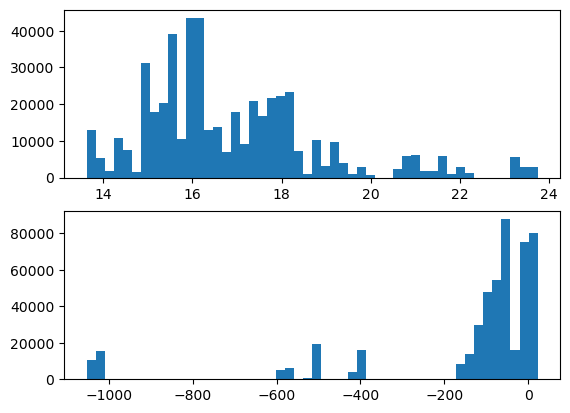

In [7]:
plt.subplot(2, 1, 1)
plt.hist(val_df['target'], bins=50)
plt.subplot(2, 1, 2)
plt.hist(val_df['prediction'], bins=50);

In [8]:
val_df.ID.unique()

array([b'layout:nlp:random:talking-heads_large_batch_size_16_train',
       b'layout:nlp:random:small_bert_bert_en_uncased_L-4_H-256_A-4_batch_size_32_train',
       b'layout:xla:random:inception_v3_batch_128_train',
       b'layout:nlp:random:small_bert_bert_en_uncased_L-10_H-512_A-8_batch_size_64_test',
       b'layout:xla:default:unet_3d.4x4.bf16',
       b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_64_train',
       b'layout:xla:random:resnet_v1_50_official_batch_128_bf16',
       b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-768_A-12_batch_size_16_test',
       b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-768_A-12_batch_size_32_train',
       b'layout:xla:random:bert_pretraining.4x4.fp16',
       b'layout:xla:default:resnet_v1_50_official_batch_128_bf16',
       b'layout:xla:default:mlperf_bert_batch_24_2x2',
       b'layout:nlp:random:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_64_train',
       b'layout:nlp:random:small_bert_b

Text(0.5, 1.0, "b'layout:nlp:random:small_bert_bert_en_uncased_L-10_H-512_A-8_batch_size_64_test'")

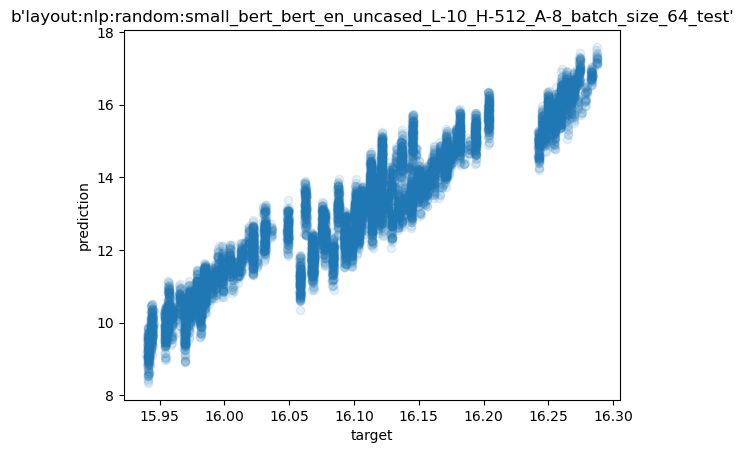

In [59]:
x_lin = np.linspace(15, 25, 100)
#plt.plot(x_lin, x_lin, color='orange')

# random_sample = val_df.sample(10_000)
graph_id = np.random.choice(val_df['ID'].unique())
random_sample = val_df[val_df['ID'] == graph_id]

plt.scatter(
    random_sample.target,
    np.clip(random_sample.prediction, a_min=-10000.0, a_max=1000.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

Text(0, 0.5, 'squared error')

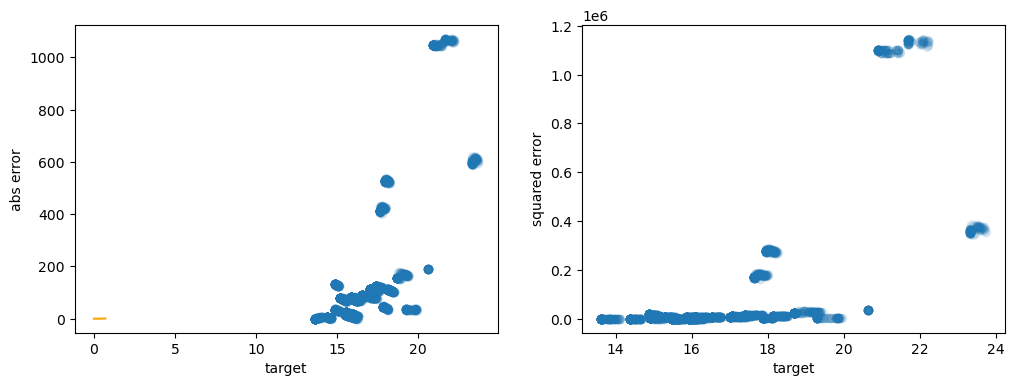

In [32]:
random_sample = val_df.sample(5_000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample['target'],
    np.abs(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('abs error')
x_lin = np.linspace(0, 0.7, 100)
plt.plot(x_lin, x_lin, color='orange')


plt.subplot(1, 2, 2)
plt.scatter(
    random_sample['target'],
    np.square(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('squared error')

In [33]:
def sort_configs(df):
    top = df.sort_values('prediction')
    top = top['config_index'].values.tolist()
    top = [str(i) for i in top]
    return ';'.join(top)

val_prediction = val_df.groupby('ID').apply(sort_configs)
val_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
val_prediction

ID
layout:nlp:default:albert_en_xlarge_batch_size_16_test                               36787;44354;17062;42412;6227;39266;39193;11367...
layout:nlp:default:bert_en_cased_L-12_H-768_A-12_batch_size_16_test                  25550;80505;25625;74269;60599;22252;22252;3074...
layout:nlp:default:bert_multi_cased_L-12_H-768_A-12_batch_size_16_train              20061;11551;11429;11445;11433;11423;20027;2001...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_32_test      67600;23266;67684;6915;88034;5693;5397;6958;87...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_64_train     28633;40750;18705;81;44276;17144;17144;44839;4...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-256_A-4_batch_size_32_test      2040;24793;43366;4948;37252;72479;84927;77121;...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-256_A-4_batch_size_64_train     22073;19313;37959;37959;24376;19383;22060;2439...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H

In [ ]:
def layout_score(candidate_order, layout_dict):
    runtimes = layout_dict['config_runtime']
    best_ranking = np.argsort(runtimes)
    assert len(candidate_order) == len(runtimes)
    score, _ = kendalltau(candidate_order, best_ranking)
    return score

In [ ]:
dirpath, filename

In [ ]:
true_order = np.argsort(layout_dict['config_runtime'])
plt.scatter(true_order, candidate_order)

In [ ]:
layout_set = 'valid'
true_orders = []
layout_ids = []
for dirpath, dirnames, filenames in os.walk('predict-ai-model-runtime/npz_all/npz/layout'):
    if len(filenames) == 0:
        continue
    
    if dirpath.split('/')[-1] != layout_set:
        continue
        
    layout_id_prefix = ':'.join(dirpath.split('/')[-4:-1])
    for filename in os.listdir(dirpath):
        print(filename)
        layout_id = layout_id_prefix+':'+filename[:-4]
        layout_dict = dict(np.load(os.path.join(dirpath, filename)))
        runtimes = layout_dict['config_runtime']
        best_ranking = np.argsort(runtimes)
        best_ranking = ';'.join([str(i) for i in best_ranking])
        true_orders.append(best_ranking)
        layout_ids.append(layout_id)
        
true_order_df = pd.DataFrame(
    data=np.stack([layout_ids, true_orders], axis=-1),
    columns=['ID', 'true_order']
)
true_order_df

In [ ]:
# layout_id = true_order_df.sample()['ID'].values[0]
layout_id = 'layout:xla:default:resnet50.4x4.fp16'
true_order = [int(i) for i in true_order_df[true_order_df['ID'] == layout_id]['true_order'].values[0].split(';')]
candidate_order = [int(i) for i in val_prediction[layout_id].split(';')]

plt.scatter(true_order, candidate_order)
plt.xlabel('true order')
plt.ylabel('candidate order')
plt.title(f'{layout_id}, len {len(true_order)}')

In [ ]:
layout_dict = dict(np.load('predict-ai-model-runtime/npz_all/npz/layout/nlp/default/valid/small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train.npz'))
layout_dict['node_config_feat'].shape

In [ ]:
val_df[val_df['ID'] == b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train']

In [ ]:
evaluation_result_layout['score'].astype(float).mean()

## Inference over test set

In [34]:
test_df = mlp.predict_over_dataset(dataset.test_data, return_labels=False)
test_df

,ID,config_index,prediction
0,b'layout:nlp:default:016ac66a44a906a695afd2228...,8,22.136948
1,b'layout:nlp:default:016ac66a44a906a695afd2228...,9,22.458447
2,b'layout:nlp:default:016ac66a44a906a695afd2228...,19,21.578609
3,b'layout:nlp:default:60880ed76de53f4d7a1b960b2...,12,-7.016151
4,b'layout:nlp:default:60880ed76de53f4d7a1b960b2...,1,-9.202328
...,...,...,...
49997,b'layout:nlp:default:23559853d9702baaaacbb0c83...,990,-39.278191
49998,b'layout:nlp:default:23559853d9702baaaacbb0c83...,991,-39.701305
49999,b'layout:xla:default:db59a991b7c607634f13570d5...,951,-1017.998352
50000,b'layout:nlp:random:492c7a94d559aa4a88769142d2...,981,-74.792488


In [35]:
test_prediction = test_df.groupby('ID').apply(sort_configs)
test_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
test_prediction

ID
layout:nlp:default:016ac66a44a906a695afd2228509046a    219;726;592;369;713;907;561;545;5;620;670;891;...
layout:nlp:default:171b0513d8874a427ccfa46d136fbadc    585;81;853;881;785;630;867;206;43;463;21;898;6...
layout:nlp:default:23559853d9702baaaacbb0c83fd32266    731;385;111;172;518;218;488;281;939;963;773;40...
layout:nlp:default:29886a50d55cfe77a9497bc906c76ce9    727;295;498;733;677;644;656;613;734;978;983;50...
layout:nlp:default:32531d07a084b319dce484f53a4cf3fc    224;571;434;394;964;842;355;583;247;512;916;49...
layout:nlp:default:38524e2ff135ded55b5286407e7af6b7    716;8;36;406;273;26;436;312;932;668;799;526;67...
layout:nlp:default:3a0c5517a87df8d82fd637b83298a3ba    518;202;725;735;537;971;620;316;562;730;888;44...
layout:nlp:default:492c7a94d559aa4a88769142d2a68362    55;25;790;463;197;160;246;89;916;283;968;958;3...
layout:nlp:default:58cc2e418c3a8a19b871e15964b534ad    491;187;551;683;579;28;283;923;242;936;544;987...
layout:nlp:default:60880ed76de53f4d7a1b960b24f20f7d 

In [36]:
pd.DataFrame(test_prediction, columns=['TopConfigs']).to_csv('layout_none_test_prediction.csv')

In [ ]:
plt.hist(np.abs(mlp.dense_layer_1.kernel.numpy().flatten()), bins=50)